<a href="https://colab.research.google.com/github/edmanft/DL_quantum_metrology/blob/main/Visualizing_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to visualize embeddings with different techniques to see if there is some relevant information inside them.

Our embeddings dictionaries are extracted from our Tabular Learner model trained on the commutative dataset (we have duplicated combinations in the training set) and with added EarlyStopping Callback monitoring the Pearson Correlation metric (the global, not the weighted).

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE

In [4]:

with open('/content/drive/MyDrive/archivos_tfm/Compound_B_embedding_dict.pkl', 'rb') as f:
    Compound_B_embedding_dict = pickle.load(f)

with open('/content/drive/MyDrive/archivos_tfm/Compound_A_embedding_dict.pkl', 'rb') as f:
    Compound_A_embedding_dict = pickle.load(f)

with open('/content/drive/MyDrive/archivos_tfm/cl_embedding_dict.pkl', 'rb') as f:
    cl_embedding_dict = pickle.load(f)




In [36]:
cl_names = list()
cl_vecs = list()
for cat, vec in cl_embedding_dict.items():
  cl_names.append(cat)
  cl_vecs.append(vec[0])
cl_vecs = np.array(cl_vecs)

In [39]:
cl_TSNE = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(cl_vecs)

Text(0.5, 1.0, 'Categorical embedding of Cell line name')

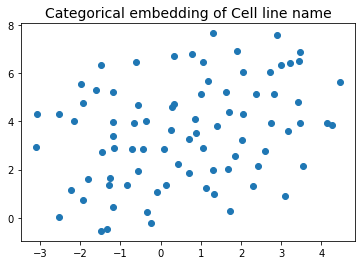

In [42]:
plt.scatter(cl_TSNE[:,0], cl_TSNE[:,1])
plt.title("Categorical embedding of Cell line name", fontsize = 14)


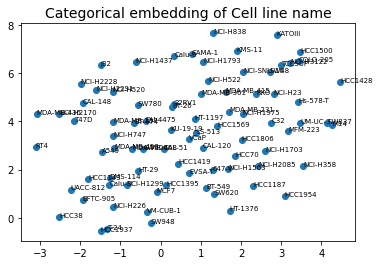

In [56]:
plt.scatter(cl_TSNE[:,0], cl_TSNE[:,1])

plt.title("Categorical embedding of Cell line name", fontsize = 14)
for i, txt in enumerate(cl_names):
    plt.annotate(txt, (cl_TSNE[i,0], cl_TSNE[i,1]), fontsize = 7)
plt.savefig("/content/drive/MyDrive/archivos_tfm/Cell_line_name_embedding_visualization.pdf")

We put everything inside a function called embedding_to_plot

In [48]:
def embedding_to_TSNE(embedding_dict):
  names = list()
  vecs = list()
  for cat, vec in embedding_dict.items():
    names.append(cat)
    vecs.append(vec[0])
  vecs = np.array(vecs)
  emb_TSNE = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(vecs)
  return names, emb_TSNE

Compound_A_names, Compound_A_TSNE = embedding_to_TSNE(Compound_A_embedding_dict)


Text(0.5, 1.0, 'Categorical embedding of Compound A')

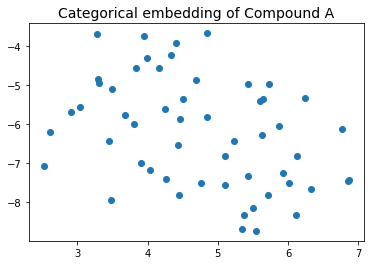

In [49]:
plt.scatter(Compound_A_TSNE[:,0], Compound_A_TSNE[:,1])
plt.title("Categorical embedding of Compound A", fontsize = 14)


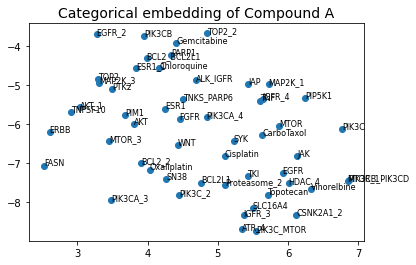

In [57]:
plt.scatter(Compound_A_TSNE[:,0], Compound_A_TSNE[:,1])
plt.title("Categorical embedding of Compound A", fontsize = 14)
for i, txt in enumerate(Compound_A_names):
    plt.annotate(txt, (Compound_A_TSNE[i,0], Compound_A_TSNE[i,1]), fontsize = 8)
plt.savefig("/content/drive/MyDrive/archivos_tfm/Compound_A_embedding_visualization.pdf")

Text(0.5, 1.0, 'Categorical embedding of Compound B')

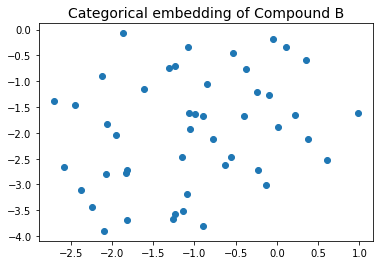

In [52]:
Compound_B_names, Compound_B_TSNE = embedding_to_TSNE(Compound_B_embedding_dict)

plt.scatter(Compound_B_TSNE[:,0], Compound_B_TSNE[:,1])
plt.title("Categorical embedding of Compound B", fontsize = 14)

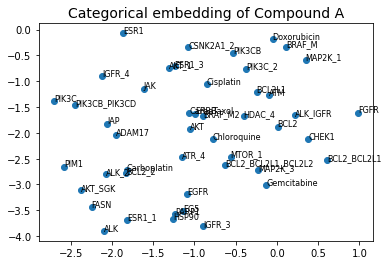

In [58]:
plt.scatter(Compound_B_TSNE[:,0], Compound_B_TSNE[:,1])
plt.title("Categorical embedding of Compound A", fontsize = 14)
for i, txt in enumerate(Compound_B_names):
    plt.annotate(txt, (Compound_B_TSNE[i,0], Compound_B_TSNE[i,1]), fontsize = 8)

plt.savefig("/content/drive/MyDrive/archivos_tfm/Compound_B_embedding_visualization.pdf")

Now that we have our embedding plots, let's see if there is a relationship between neighbouring and pathway and/or target.